<a href="https://colab.research.google.com/github/X-ray-Dawgz/XRayDawgz/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b rob https://github.com/X-ray-Dawgz/XRayDawgz.git

fatal: destination path 'XRayDawgz' already exists and is not an empty directory.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image

import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# image size
img_width, img_height = 432,288
# train and test sample sizes
train_samples = 665
test_samples = 98
# set weights
epochs = 100
batch_size = 20
# Directories of train and test data
train_dir = 'XRayDawgz/cut_image'
test_dir = 'XRayDawgz/Images/Test'

In [0]:
# data image augmentation to create more variation of XRD patterns
train_data = ImageDataGenerator(rescale=1. / 255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

# only resize for test data
test_data = ImageDataGenerator(rescale=1. / 255)

In [5]:
# import train data consisting of 'binary' or  2 classifications (BCC or FCC) 
train_gen = train_data.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 1330 images belonging to 2 classes.


In [6]:
# import test data consisting of 'binary' or  2 classifications (BCC or FCC) 
test_gen = test_data.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 196 images belonging to 2 classes.


In [7]:
# build CNN model
model = Sequential()
# extract features by iterating across image
#model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(ZeroPadding2D((1,1)))
#convert 3D features to 1D feature vectors
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 430, 286, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 430, 286, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 215, 143, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 213, 141, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 213, 141, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 106, 70, 64)       0         


In [8]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# try adam



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
cs_classification = model.fit_generator(train_gen,
                    steps_per_epoch=train_samples // batch_size,
                    epochs=epochs,
                    validation_data=test_gen,
                    validation_steps=test_samples // batch_size)




Epoch 1/100





33/33 [==============================] - 20s 591ms/step - loss: 2.3928 - acc: 0.5074 - val_loss: 0.6938 - val_acc: 0.4375
Epoch 2/100
33/33 [==============================] - 17s 526ms/step - loss: 0.7223 - acc: 0.5409 - val_loss: 0.6800 - val_acc: 0.5500
Epoch 3/100
33/33 [==============================] - 17s 516ms/step - loss: 0.7195 - acc: 0.5440 - val_loss: 0.6918 - val_acc: 0.5395
Epoch 4/100
33/33 [==============================] - 18s 533ms/step - loss: 0.7318 - acc: 0.5439 - val_loss: 0.6946 - val_acc: 0.4750
Epoch 5/100
33/33 [==============================] - 17s 528ms/step - loss: 0.7271 - acc: 0.5197 - val_loss: 0.7275 - val_acc: 0.5132
Epoch 6/100
33/33 [==============================] - 17s 523ms/step - loss: 0.7035 - acc: 0.5471 - val_loss: 0.7079 - val_acc: 0.4375
Epoch 7/100
33/33 [==============================] - 17s 520ms/step - loss: 0.7595 - acc: 0.5788 - val_loss: 0.6517 - val_acc: 0.7375
Epoch 8/100
33/33 [==============================] - 1

loss: 0.35
Validation loss: 0.43
Accuracy: 0.86
Validation Accuracy: 0.84


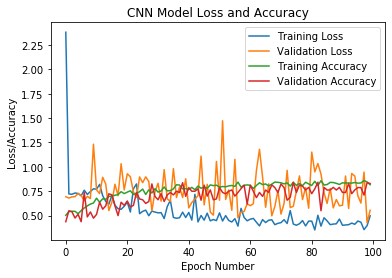

In [20]:
x = np.arange(0, epochs)
plt.figure()
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.plot(x, cs_classification.history["loss"], label="Training Loss")
plt.plot(x, cs_classification.history["val_loss"], label="Validation Loss")
plt.plot(x, cs_classification.history["acc"], label="Training Accuracy")
plt.plot(x, cs_classification.history["val_acc"], label="Validation Accuracy")
plt.title("CNN Model Loss and Accuracy")
plt.legend(loc="upper right")
print('loss: %.2f' %(np.amin(cs_classification.history["loss"])))
print('Validation loss: %.2f' %(np.amin(cs_classification.history["val_loss"])))
print('Accuracy: %.2f' %(np.amax(cs_classification.history["acc"])))
print('Validation Accuracy: %.2f' %(np.amax(cs_classification.history["val_acc"])))

In [11]:
BCC_test_dir = 'XRayDawgz/Images/Test/BCC_test/'
FCC_test_dir = 'XRayDawgz/Images/Test/FCC_test/'

BCC_Prediction = np.zeros(test_samples)
FCC_Prediction = np.zeros(test_samples)
i=0
correct_count=0
for file in os.listdir(BCC_test_dir):
  predict_img = image.load_img(BCC_test_dir + file, target_size = (img_width, img_height))
  predict_img = image.img_to_array(predict_img)
  predict_img = np.expand_dims(predict_img, axis = 0)
  result = model.predict(predict_img)
  if np.round(result, 0) == 0:
    correct_count += 1
  else:
    pass
print('BCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

i=0
correct_count=0
for file in os.listdir(FCC_test_dir):
  predict_img = image.load_img(FCC_test_dir + file, target_size = (img_width, img_height))
  predict_img = image.img_to_array(predict_img)
  predict_img = np.expand_dims(predict_img, axis = 0)
  result = model.predict(predict_img)
  if np.round(result, 0) == 1:
    correct_count += 1
  else:
    pass
print('FCC prediction accuracy: %.2f' % ((correct_count / test_samples)*100) + '%')

BCC prediction accuracy: 70.41%
FCC prediction accuracy: 87.76%


In [12]:
predict_img = image.load_img('download.png', target_size = (img_width, img_height))
predict_img = image.img_to_array(predict_img)
predict_img = np.expand_dims(predict_img, axis = 0)

result = np.round(model.predict(predict_img), decimals=0)
print(np.round(result, decimals=0))

FileNotFoundError: ignored